# RED WINE QUALITY PREDICTION

In [221]:
## Import Numpy, Pandas, Matplotlib, and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

# Import KMeans library
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

# Import performance metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix


In [222]:
## load my dataset
red_wine = pd.read_csv('winequality-red.csv')
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [223]:
red_wine.shape

(1599, 12)

In [224]:
red_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [225]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [226]:
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


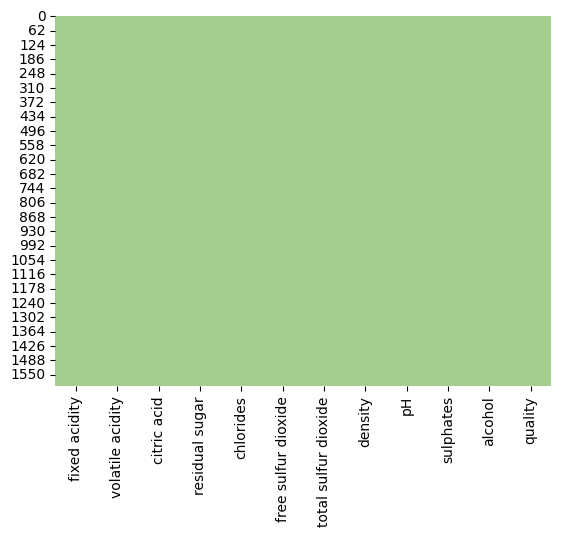

In [227]:
# # check for nulls
# df.isnull().sum()
sns.heatmap(red_wine.isna(), cbar=False, cmap='crest')
plt.show()

In [228]:
red_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [229]:
red_wine['quality'].value_counts()
# There are 6 different quality rankings. Info may be useful for later

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

# Data preparation

In [230]:
# let's scale the data within a min of 1 and max of 10
scaled_data = (red_wine - red_wine.min()) / (red_wine.max() - red_wine.min()) *9 + 1
scaled_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.00000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,3.962543,3.513962,3.43878,2.010223,2.133888,2.885553,2.286962,5.411903,5.047259,2.768467,3.801054,5.744841
std,1.386714,1.103793,1.75321,0.869134,0.707158,1.325935,1.046141,1.247137,1.094077,0.913511,1.475540,1.453625
min,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.991150,2.664384,1.81000,1.616438,1.871452,1.760563,1.508834,4.654185,4.330709,2.185629,2.523077,4.600000
50%,3.628319,3.465753,3.34000,1.801370,2.006678,2.647887,2.017668,5.414097,5.039370,2.562874,3.492308,6.400000
75%,4.663717,4.205479,4.78000,2.047945,2.171953,3.535211,2.780919,6.131057,5.677165,3.155689,4.738462,6.400000
max,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [231]:
# check if my scaled_data is a Pandas or numpy
if hasattr(scaled_data, 'head'):
    print("It's a pandas DataFrame.")

# if hasattr(scaled_data, 'shape'):
#     print("It's a numpy array.")

It's a pandas DataFrame.


In [232]:
# There are no missing values
# All classes are either float or integer
# time to do some EDA

Definitions

In [233]:
""""
Fixed Acidity: The amount of non-volatile acids in the wine. It contributes to its overall acidity.

Volatile Acidity: The amount of volatile acids in the wine which can contribute to a sour or vinegary acidity.

Citric Acid: The amount of citric acid in the wine, which can add freshness and flavor.

Residual Sugar: The amount of sugar remaining after fermentation. Ita ffects the sweetness.
Chlorides: The amount of salt in the wine.

Free Sulfur Dioxide: The free form of SO2 that exists in equilibrium between molecular SO2 
(as a dissolved gas) and bisulfite ion.

Total Sulfur Dioxide: The amount of free and bound forms of sulfur dioxide.

Density: The density of the wine.

pH: The acidity or alkalinity level of the wine.

Sulphates: The amount of sulphates in the wine, which can contribute to SO2 gas dissolution 
and is known to affect wine aroma and flavor.

Alcohol: The alcohol content of the wine.

Quality: The target label, representing the quality of the wine 
(usually on a scale from 3 to 9 for white wines and 4 to 8 for red wines).
"""

'"\nFixed Acidity: The amount of non-volatile acids in the wine. It contributes to its overall acidity.\n\nVolatile Acidity: The amount of volatile acids in the wine which can contribute to a sour or vinegary acidity.\n\nCitric Acid: The amount of citric acid in the wine, which can add freshness and flavor.\n\nResidual Sugar: The amount of sugar remaining after fermentation. Ita ffects the sweetness.\nChlorides: The amount of salt in the wine.\n\nFree Sulfur Dioxide: The free form of SO2 that exists in equilibrium between molecular SO2 \n(as a dissolved gas) and bisulfite ion.\n\nTotal Sulfur Dioxide: The amount of free and bound forms of sulfur dioxide.\n\nDensity: The density of the wine.\n\npH: The acidity or alkalinity level of the wine.\n\nSulphates: The amount of sulphates in the wine, which can contribute to SO2 gas dissolution \nand is known to affect wine aroma and flavor.\n\nAlcohol: The alcohol content of the wine.\n\nQuality: The target label, representing the quality of th

# Visualization

In [234]:
# sns.pairplot(data=red_wine, hue='quality')
# plt.show()

Distribution charts

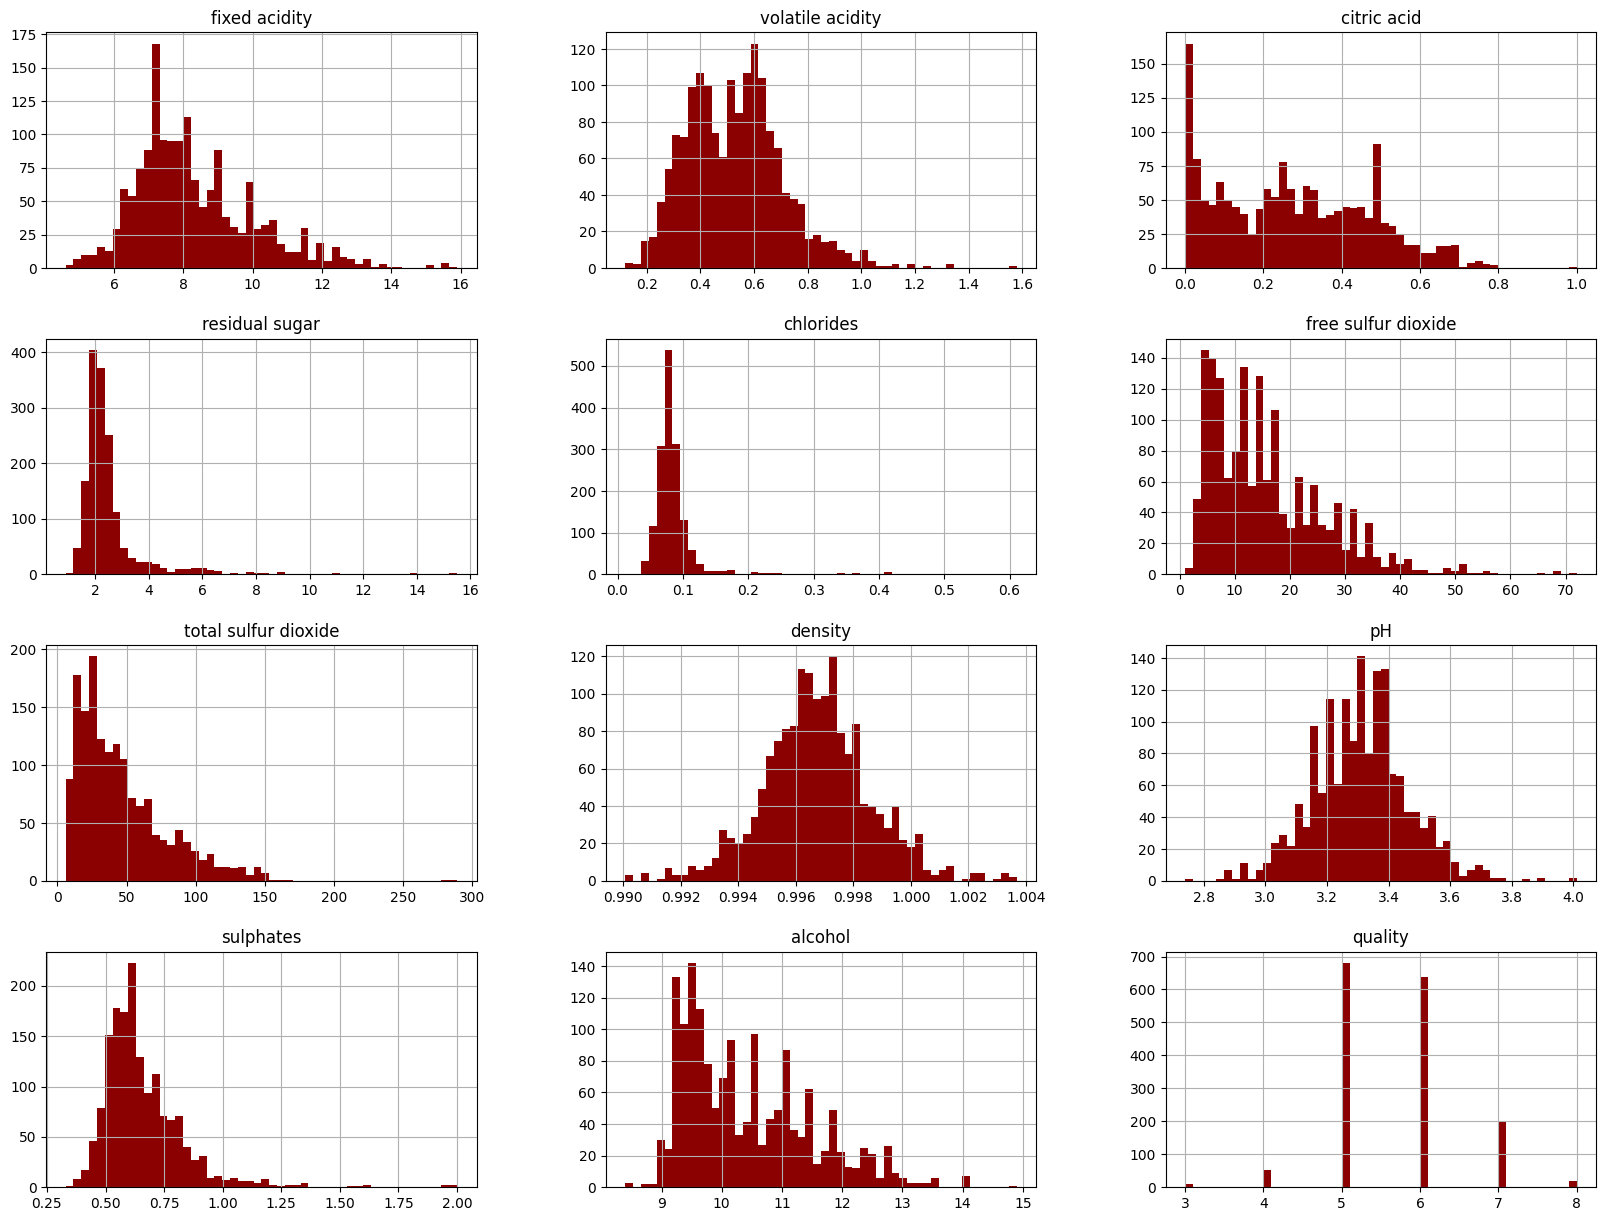

In [235]:
# Create histograms for our twelve columns
red_wine.hist(bins=50, figsize=(20, 15), color = 'darkred')
plt.show()

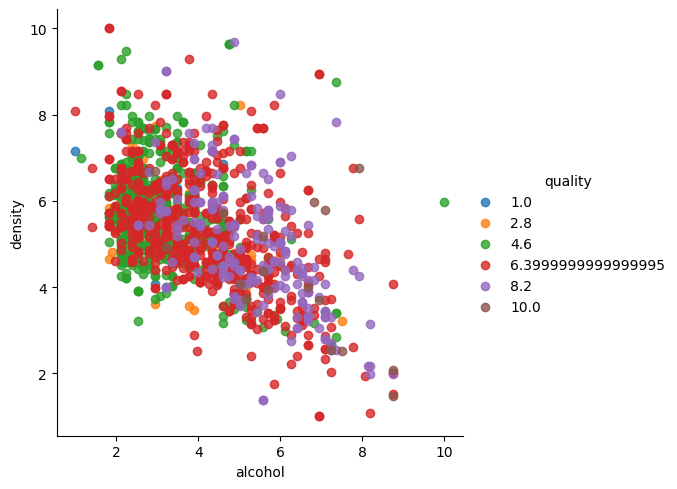

In [236]:
# Scatter plot between density and alcohol accounting for quality levels
sns.lmplot(x= 'alcohol', y= 'density', data = scaled_data, hue ='quality', fit_reg= False) 

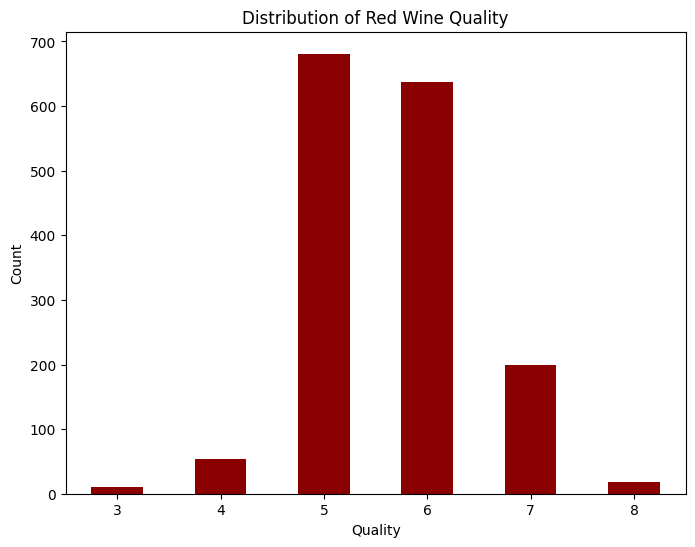

In [237]:
# Assuming 'red_wine' is my df
quality_counts = red_wine['quality'].value_counts().sort_index()

# Create the bar chart
plt.figure(figsize=(8, 6))
quality_counts.plot(kind='bar', color='darkred')
plt.title('Distribution of Red Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.grid(False)
plt.xticks(rotation=0)  
plt.show()


Correlation Matrix

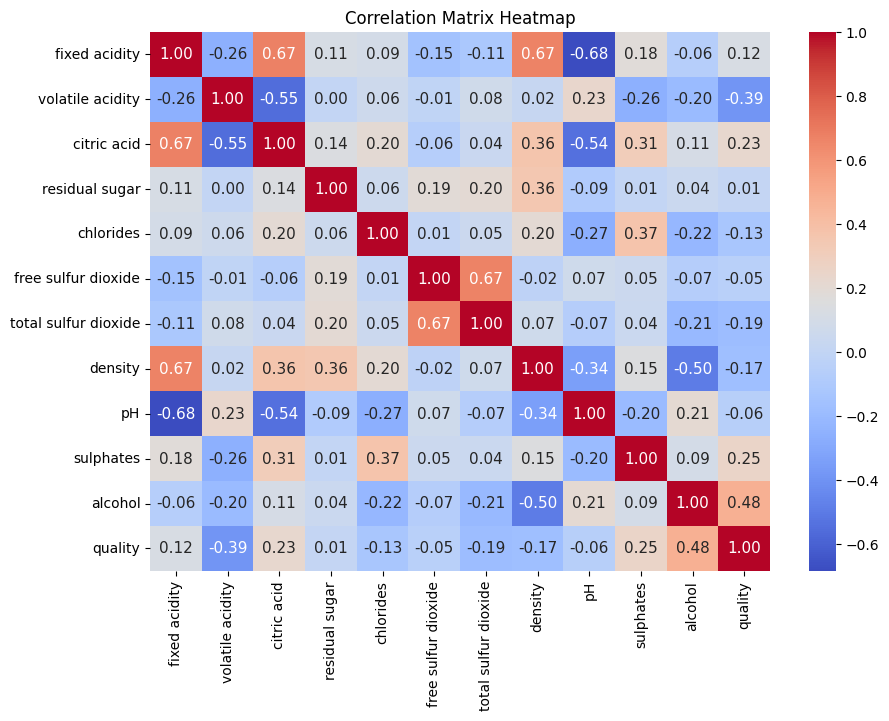

In [238]:
# correlation_matrix = selected_data.corr()
correlation_matrix = red_wine.corr()
# Create a correlation heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt = ".2f", annot_kws={'size': 11})
plt.title("Correlation Matrix Heatmap", loc="center")
plt.show()

In [239]:
# correl vs target 
red_wine.corr()["quality"].sort_values()

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

In [240]:
# # Alcohol and vol acidity have respectively the highest and lowest correlations vs. quality

# Model

Kmeans can find patterns in my data that i did not know were there

Find the number of clusters K: the elbow method

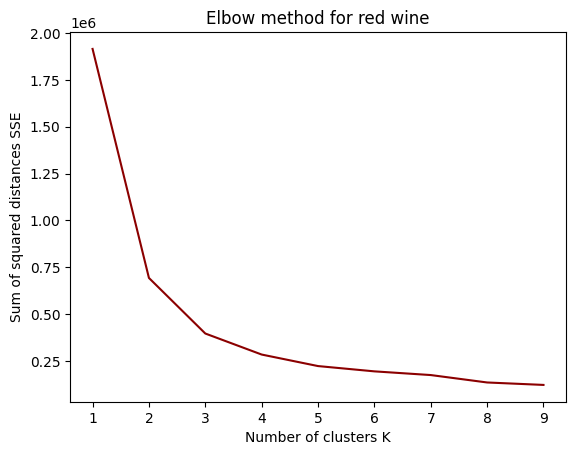

In [241]:
# To find the optimal number of clusters let's use the Elbow method 
elb_plot = []
for x in range(1,10):
    kmeans = KMeans(n_clusters = x, init = 'k-means++', random_state=42, n_init="auto")
    kmeans.fit(red_wine)
    elb_plot.append(kmeans.inertia_)

plt.plot(range(1,10), elb_plot, color = 'darkred')
plt.title("Elbow method for red wine")

plt.xlabel("Number of clusters K")
plt.ylabel("Sum of squared distances SSE")
plt.grid(False)
plt.show()

Fit KMeans Model

In [242]:
k = 3  # Set the number of clusters based on the elbow method 
kmeans = KMeans(n_clusters=k, random_state=0)
red_y_pred = kmeans.fit_predict(scaled_data)
# should i write red_wine['cluster'] instead of red_y_pred
red_y_pred

array([1, 1, 1, ..., 2, 1, 2])

In [243]:
red_wine['clusters'] = red_y_pred
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clusters
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1


In [244]:
# let's look at the centroids
kmeans.cluster_centers_

array([[5.6301976 , 2.87521111, 5.44143836, 2.19635485, 2.37304183,
        2.5755354 , 2.0651532 , 6.46516505, 4.16195664, 3.21487163,
        3.74288725, 6.03835616],
       [3.39572051, 4.07057606, 2.41929104, 1.96640513, 2.11628211,
        2.99955329, 2.5121829 , 5.44954468, 5.29004583, 2.46842881,
        3.0217566 , 5.02089552],
       [3.19305421, 3.04408887, 3.27773109, 1.88053989, 1.88012233,
        3.00917268, 2.05187517, 4.03489061, 5.58664726, 2.89649273,
        5.62747253, 7.01512605]])

In [245]:
from sklearn.decomposition import PCA

# Assuming i have already performed clustering and assigned cluster labels to my data
clustered_data = red_wine

# Fit the KMeans model to get cluster centroids
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(scaled_data)

# Perform PCA on the cluster centroids to reduce dimensionality to 2D
pca = PCA(n_components=2)
centroids_2d = pca.fit_transform(kmeans.cluster_centers_)

# Centroid coordinates in 2D are stored in the 'centroids_2d' variable
print("Cluster Centroid Coordinates in 2D:")
print(centroids_2d)


Cluster Centroid Coordinates in 2D:
[[ 2.82091169 -0.42478664]
 [-0.93411047  2.09907939]
 [-1.88680122 -1.67429276]]


In [246]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
red_wine['PCA1'] = principal_components[:, 0]
red_wine['PCA2'] = principal_components[:, 1]

# PCA (principal component analysis helps visualize the data and potentially identify clusters more easily.
# Because I have a high dimensionality with over 9 features, the primary goal of PCA is 
# to reduce the dimensionality of my data while preserving as much of the variance as possible. 
# # The resulting 'PCA1' and 'PCA2' columns allow you to plot your data in a 2D space.
# It doesn't "compress" the data visually, but it helps project my data onto a 2D plane
#  while retaining the most important information.

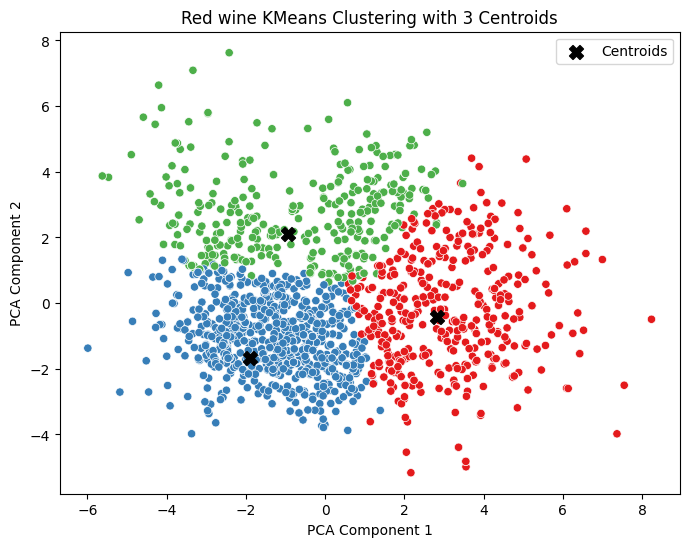

In [247]:
# Assuming I already performed clustering and assigned cluster labels to my data
clustered_data = red_wine

# Fit the KMeans model to get cluster centroids
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(scaled_data)

# Extract the cluster centroids
pca = PCA(n_components=2)
centroids = pca.fit_transform(kmeans.cluster_centers_)

# Plot the clusters and centroids in a 2D space using PCA components
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='clusters', data = clustered_data, palette='Set1', legend=False)
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=100, marker='X', label='Centroids')
plt.title('Red wine KMeans Clustering with 3 Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


# Model evaluation

In [248]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

print('Within Cluster Sum of squares: ', kmeans.inertia_)

silhouette_avg = round(silhouette_score(scaled_data, red_wine['clusters']),3)
print("Silhouette Score:", silhouette_avg)

db_index = round(davies_bouldin_score(scaled_data, red_wine['clusters']),3)
print("Davies-Bouldin Index:", db_index)

inertia = round(kmeans.inertia_,3)
print("Within Cluster Sum of squares:", inertia)
# WCSS (Within-Cluster Sum of Squares) or inertia is a metric used in clustering, 
# particularly in the context of K-means clustering, to evaluate the quality of clustering. 
# It measures the total variance or the sum of squared distances between data points and their 
# respective cluster centroids. Lower WCSS values indicate that data points are closer to the centroids 
# of their respective clusters, suggesting better clustering.


# The silhouette score measures how similar an object is to its own cluster (cohesion) compared 
# to other clusters (separation). 
# Silhouette Score near 1: This indicates that the object is well matched to its own cluster and poorly matched 
# to neighboring clusters. In other words, the clusters are well separated.
# Silhouette Score near 0: This indicates that the object is on or very close to the decision boundary between 
# two neighboring clusters. It could be in a situation where it's difficult to decide to which cluster it 
# belongs.
# Silhouette Score near -1: This indicates that the object is poorly matched to its own cluster and well matched
#  to a neighboring cluster. It suggests that the object may be assigned to the wrong cluster.


Within Cluster Sum of squares:  19536.956872525032
Silhouette Score: 0.206
Davies-Bouldin Index: 1.591
Within Cluster Sum of squares: 19536.957


In [249]:
# Initialize an empty list to score metric dictionaries
metrics_list = []

# Fit KMeans for different values of k and calculate metrics for each cluster
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=0)
    clustered_data['cluster'] = kmeans.fit_predict(scaled_data)
    
    silhouette_avg = silhouette_score(scaled_data, clustered_data['cluster'])
    db_index = davies_bouldin_score(scaled_data, clustered_data['cluster'])
    inertia = kmeans.inertia_
    
    # Create a dictionary for the current cluster
    metric_dict = {'Cluster': k, 'Silhouette Score': silhouette_avg, 'Davies-Bouldin Index': db_index, 
                   'Inertia': inertia}
    
    # Append the metric dictionary to the list
    metrics_list.append(metric_dict)

# Create a DataFrame from the list of metric dictionaries
metrics_df = pd.DataFrame(metrics_list)

# Display the table of metrics
print(metrics_df)



   Cluster  Silhouette Score  Davies-Bouldin Index       Inertia
0        2          0.234248              1.702076  22430.004073
1        3          0.206322              1.590676  19536.956873
2        4          0.188596              1.618829  17470.660848
3        5          0.181050              1.630318  16004.003315
4        6          0.189902              1.511546  15110.854136
5        7          0.150135              1.605204  14384.696810


In [250]:
for x in range(2,10):
    kmeans = KMeans(n_clusters= x, max_iter= 100)
    kmeans.fit(scaled_data)
    score = silhouette_score(scaled_data, kmeans.labels_)
    rd = round(score, 3)
    print(f"For cluster: {x}, the silhouette score is: {rd}", )

For cluster: 2, the silhouette score is: 0.234
For cluster: 3, the silhouette score is: 0.205
For cluster: 4, the silhouette score is: 0.189
For cluster: 5, the silhouette score is: 0.18
For cluster: 6, the silhouette score is: 0.189
For cluster: 7, the silhouette score is: 0.153
For cluster: 8, the silhouette score is: 0.146
For cluster: 9, the silhouette score is: 0.148


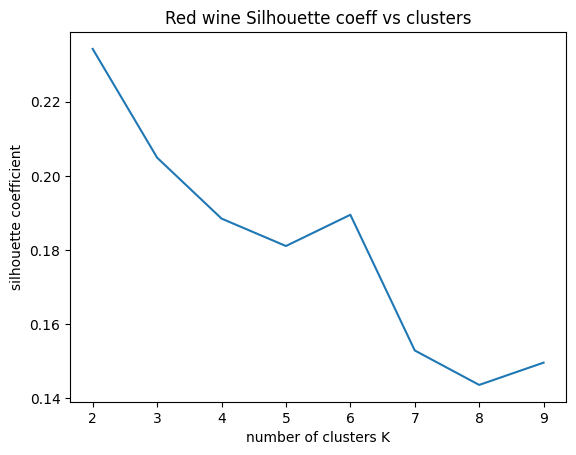

In [257]:
silhouette_coefficients = []
for x in range(2,10):
    kmeans = KMeans(n_clusters= x, max_iter= 100)
    kmeans.fit(scaled_data)
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.plot(range(2,10), silhouette_coefficients)
plt.xticks(range(2,10))
plt.title('Red wine Silhouette coeff vs clusters')
plt.xlabel("number of clusters K")
plt.ylabel("silhouette coefficient")
plt.show()

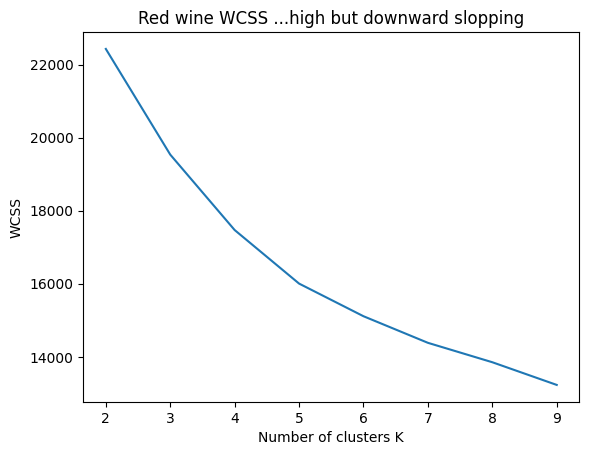

In [256]:
wcss = []

for x in range(2, 10):
    kmeans = KMeans(n_clusters=x, max_iter=100)
    kmeans.fit(scaled_data)
    
    # Calculate the WCSS for this number of clusters
    wcss.append(kmeans.inertia_)  # Use 'inertia_' to get WCSS

plt.plot(range(2, 10), wcss)
plt.xticks(range(2, 10))
plt.xlabel("Number of clusters K")
plt.ylabel("WCSS")
plt.title("Red wine WCSS ...high but downward slopping")
plt.show()


In [253]:
# The evaluation metrics for the KMeans clustering on the Kaggle red wine dataset show how the clustering 
# quality changes with different numbers of clusters (k). The Silhouette Score, Davies-Bouldin Index, 
# and Inertia values can be used to determine the optimal number of clusters. In this specific case, 
# a Silhouette Score of 0.206 suggests moderate separation between clusters for k=3, 
# and the Davies-Bouldin Index of 1.590676 indicates relatively good cluster cohesion and separation. 
# However, the Inertia decreases as the number of clusters increases, which is expected. 
# The optimal number of clusters would typically be where these metrics stabilize, which appears to be around 
# k=3, given the Silhouette Score and Davies-Bouldin Index. 



# Let's try a logistic regression to double check robustness of model

In [254]:
# This could be a regression exercice as well since we have labelled data
X = red_wine.drop('quality', axis = 1)
y = red_wine['quality']

# Split data
X_train, X_test, y_train, y_test = train_test_split( X,y, test_size = 0.2, random_state= 32)

Scaler_X = MinMaxScaler()
X_train = Scaler_X.fit_transform(X_train) # scaling training set
X_test = Scaler_X.fit_transform(X_test) # scaling test set

# Create a logistic regression model
logr_model = LogisticRegression(random_state=0, max_iter=1000)
# Train the model
logr_model.fit(X_train, y_train)
# Make prediction using the test dataset on Logistic Classifier model

LogisticRegression(max_iter=1000, random_state=0)

In [255]:
# Make predictions on the test data
logr_y_pred = logr_model.predict(X_test)

# Calculate and print the model's accuracy score
accuracy = round(accuracy_score(y_test, logr_y_pred),4)
print("Logistic Regression Accuracy:", accuracy)
print()

# Print the model's classification report
print(classification_report(y_test,logr_y_pred))

Logistic Regression Accuracy: 0.6969

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         8
           5       0.66      0.96      0.78       120
           6       0.78      0.60      0.68       146
           7       0.58      0.53      0.55        40
           8       0.00      0.00      0.00         5

    accuracy                           0.70       320
   macro avg       0.34      0.35      0.34       320
weighted avg       0.68      0.70      0.67       320

